# Заряд/разряд индуктивности

## Заряд
Напряжение на индуктивности:
$ U_L(t) = \frac{U}{L}e^{-\frac{R}{L}t} $

Ток в индуктивности (при отсутствии тока перед зарядом):
$ I_L(t) = \frac{U}{R}(1-e^{-\frac{R}{L}t}) $

## Разряд
Напряжение на индуктивности:
$ U_L(t) = -Ue^{-\frac{R}{L}t} $

Ток в индуктивности (при отсутствии тока перед зарядом):
$ I_L(t) = \frac{U}{R}e^{-\frac{R}{L}t} $

In [6]:
import math
class LR():
    def __init__(self, l, r):
        self.l, self.r = l, r
    @property
    def tau(self): return self.l/self.r
    def charge_u(self, u, t):
        return (u/self.l)*math.exp(-t/self.tau)
    def charge_i(self, u, t):
        return (u/self.r)*(1-math.exp(-t/self.tau))
    def discharge_u(self, u, t):
        return -u*math.exp(-t/self.tau)
    def discharge_i(self, u, t):
        return (u/self.r)*math.exp(-t/self.tau)

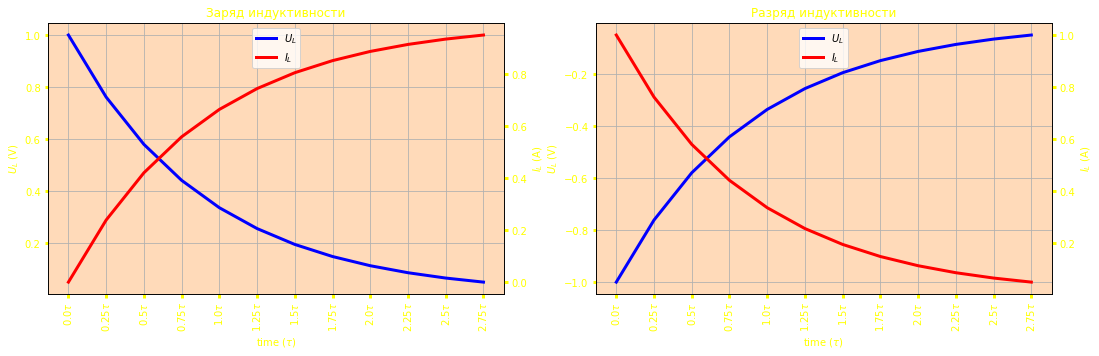

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
lr1 = LR(1, 1)
fig, (ax_charge, ax_discharge) = plt.subplots(1, 2)
num_points, tau_miltiply, u = 12, 3, 1
x_range = numpy.linspace(0, lr1.tau*tau_miltiply, num=num_points)
fig.set_size_inches(18, 5)

def plot_u_i(ax, u_data, i_data, title):
    p1 = ax.plot(x_range, u_data, linewidth=3, color='blue', label='$U_L$')
    ax.set(xlabel='time ($ \\tau $)', ylabel='$U_L$ (V)', facecolor='peachpuff', title=title)
    ax2 = ax.twinx()
    p2 = ax2.plot(x_range, i_data, linewidth=3, color='red', label='$I_L$')
    ax2.set(ylabel='$I_L$ (A)') ; ax2.tick_params(axis='y', colors='yellow')
    ax2.yaxis.label.set_color('yellow')
    ax2.tick_params(width=3)
    ax.tick_params(axis='x', colors='yellow') ; ax.tick_params(axis='y', colors='yellow')
    ax.xaxis.label.set_color('yellow') ; ax.yaxis.label.set_color('yellow')
    ax.set_xticks(x_range)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels([ '${}\\tau$'.format((i*tau_miltiply)/num_points) for i in range(num_points) ])
    ax.tick_params(width=3)
    ax.grid()
    ax.title.set_color('yellow')
    ax.legend([p1[0], p2[0]], [p1[0].get_label(), p2[0].get_label()], loc='upper center')

plot_u_i(ax_charge, [ lr1.charge_u(u, i) for i in x_range ], [ lr1.charge_i(u, i) for i in x_range ], 'Заряд индуктивности')
plot_u_i(ax_discharge, [ lr1.discharge_u(u, i) for i in x_range ], [ lr1.discharge_i(u, i) for i in x_range ], 'Разряд индуктивности')